# Assignment 4: Pipelines and Hyperparameter Tuning (32 total marks)
### Due: November 22 at 11:59pm

### Name: Carrie Chan

### In this assignment, you will be putting together everything you have learned so far. You will need to find your own dataset, do all the appropriate preprocessing, test different supervised learning models and evaluate the results. More details for each step can be found below.

### You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

## Step 1: Data Input (4 marks)

Import the dataset you will be using. You can download the dataset onto your computer and read it in using pandas, or download it directly from the website. Answer the questions below about the dataset you selected. 

To find a dataset, you can use the resources listed in the notes. The dataset can be numerical, categorical, text-based or mixed. If you want help finding a particular dataset related to your interests, please email the instructor.

**You cannot use a dataset that was used for a previous assignment or in class**

In [2]:
# Import dataset (1 mark)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Questions (3 marks)

1. (1 mark) What is the source of your dataset?
2. (1 mark) Why did you pick this particular dataset?
3. (1 mark) Was there anything challenging about finding a dataset that you wanted to use?

*ANSWER HERE*
1. The dataset was sourced from Kaggle: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data/data
2. This dataset was chosen since it had a Kaggle usability score of 10 (100% in completeness, credibility, and compatability). I also found this topic and dataset interesting as it focused on the topic of early detection in cardiovascular diseases with the help of machine learning. 
3. There was no challenge in finding a dataset I wanted to use as Kaggle had many resources available. 

## Step 2: Data Processing (5 marks)

The next step is to process your data. Implement the following steps as needed.

In [13]:
# Clean data (if needed)
df.isnull().sum()

#no missing values found in dataset

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

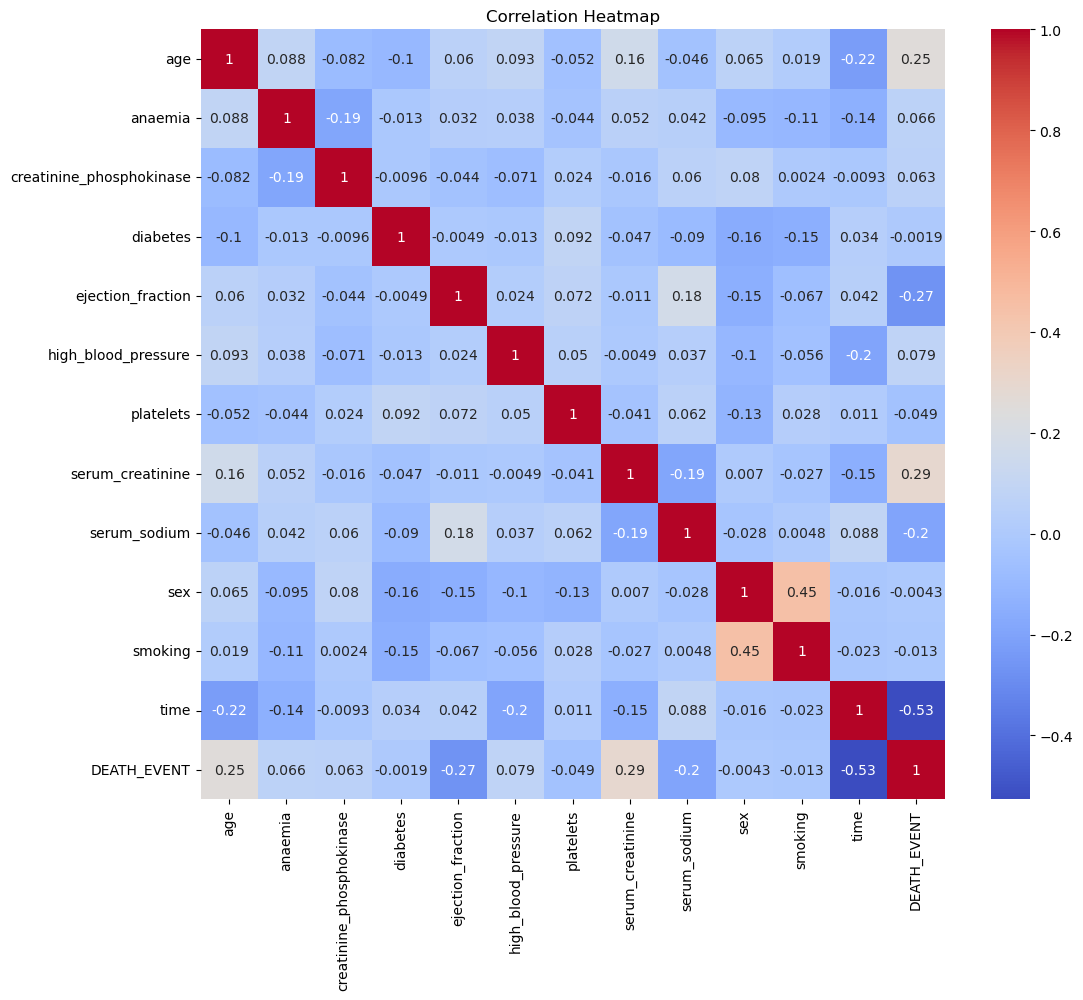

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

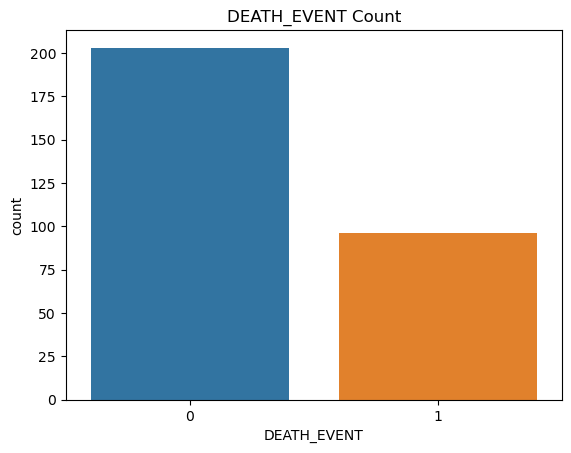

In [15]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('DEATH_EVENT Count')
plt.show()

# plot shows imbalanced dataset

In [16]:
# Implement preprocessing steps. Remember to use ColumnTransformer if more than one preprocessing method is needed
import mglearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop('DEATH_EVENT', axis = 1)
y = df['DEATH_EVENT']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# scaling will done in pipeline, encoding is not needed since data values are all numerical or are already encoded as binary (0 or 1) categorical variables

In [17]:
X.shape

(299, 12)

### Questions (2 marks)

1. (1 mark) Were there any missing/null values in your dataset? If yes, how did you replace them and why? If no, describe how you would've replaced them and why.
2. (1 mark) What type of data do you have? What preprocessing methods would you have to apply based on your data types?

*ANSWER HERE*
1. There was no missing/null values in the dataset. If there were missing/null values, I would fill the missing values with the average value of the column (where the missing values are located) and drop the rows with missing values in the columns that have boolean data. Averages would be used in non-boolean columns since there is no correlation between the rows to forward-fill or back-fill values and zero is not a significant number to the dataset for these columns. For the boolean value columns, the missing data would be dropped since zero or one are the only two significant values for these spots and it cannot be assumed that the data should be one or the other. 

2. The dataset is numerical, and has data that have different scales. Standardscaler will help standardize and scale the data to ensure that all variables contribute equally to the model fitting and model learned function (helps minimize bias). As well, it would help with using non-linear models such as SVM since this model requires scaling. 


## Step 3: Implement Machine Learning Model (11 marks)

In this section, you will implement three different supervised learning models (one linear and two non-linear) of your choice. You will use a pipeline to help you decide which model and hyperparameters work best. It is up to you to select what models to use and what hyperparameters to test. You can use the class examples for guidance. You must print out the best model parameters and results after the grid search.

In [18]:
# Implement pipeline and grid search here. Can add more code blocks if necessary
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, f1_score

lr_pipeline = Pipeline([('scaler', scaler), ('classifier', LogisticRegression(max_iter = 5000, random_state = 0))])

rf_pipeline = Pipeline([('scaler', scaler), ('classifier', RandomForestClassifier(random_state = 0))])

svm_pipeline = Pipeline([('scaler', scaler), ('classifier', SVC(random_state = 0))])

param_grid_lr = {'classifier__C': [0.1, 1, 10], 'classifier__penalty': ['l1', 'l2'], 'classifier__solver': ['liblinear', 'saga'], 'classifier__class_weight': [None, 'balanced']}

param_grid_rf = {'classifier__n_estimators': [200, 300, 400], 'classifier__max_depth': [5, 10, 15], 'classifier__class_weight': [None, 'balanced']}

param_grid_svm = {'classifier__C': [0.1, 1, 10], 'classifier__kernel': ['linear', 'rbf', 'sigmoid'], 'classifier__gamma': [0.001, 0.01, 0.1], 'classifier__class_weight': [None, 'balanced']}

scoring = {'accuracy': make_scorer(accuracy_score), 'f1_score': make_scorer(f1_score)}

In [19]:
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring=scoring, refit='f1_score')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring=scoring, refit='f1_score')
grid_search_svm = GridSearchCV(svm_pipeline, param_grid_svm, cv=5, scoring=scoring, refit='f1_score')

grid_search_lr.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)

best_params_lr = grid_search_lr.best_params_
best_params_rf = grid_search_rf.best_params_
best_params_svm = grid_search_svm.best_params_

results_lr = grid_search_lr.cv_results_
results_rf = grid_search_rf.cv_results_
results_svm = grid_search_svm.cv_results_

print("\nLogistic Regression Results:")
print("Accuracy scores:", results_lr['mean_test_accuracy'])
print("F1 scores:", results_lr['mean_test_f1_score'])
print("\nBest Parameters for Logistic Regression based on F1:", best_params_lr)
print("Logistic Regression Accuracy:", results_lr['mean_test_accuracy'].mean())

print("\nRandom Forest Results:")
print("Accuracy scores:", results_rf['mean_test_accuracy'])
print("F1 scores:", results_rf['mean_test_f1_score'])
print("\nBest Parameters for Random Forest based on F1:", best_params_rf)
print("Random Forest Accuracy:", results_rf['mean_test_accuracy'].mean())

print("\nSVM Results:")
print("Accuracy scores:", results_svm['mean_test_accuracy'])
print("F1 scores:", results_svm['mean_test_f1_score'])
print("\nBest Parameters for SVM based on F1:", best_params_svm)
print("SVM Accuracy:", results_svm['mean_test_accuracy'].mean())


Logistic Regression Results:
Accuracy scores: [0.83949495 0.84383838 0.84838384 0.81717172 0.7279798  0.78141414
 0.79040404 0.7859596  0.82606061 0.83050505 0.84393939 0.84393939
 0.79040404 0.79929293 0.79484848 0.79484848 0.83505051 0.83505051
 0.83949495 0.83949495 0.7859596  0.7859596  0.7859596  0.7859596 ]
F1 scores: [0.72904762 0.70478997 0.74870279 0.6685061  0.66077116 0.68658945
 0.7049941  0.69391983 0.70779557 0.71223105 0.73934319 0.73934319
 0.69514719 0.70413567 0.70043819 0.70043819 0.724612   0.724612
 0.734612   0.734612   0.69308525 0.69308525 0.69308525 0.69308525]

Best Parameters for Logistic Regression based on F1: {'classifier__C': 0.1, 'classifier__class_weight': None, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Logistic Regression Accuracy: 0.8104755892255892

Random Forest Results:
Accuracy scores: [0.86151515 0.85262626 0.85262626 0.86151515 0.86151515 0.8659596
 0.86151515 0.85262626 0.8659596  0.83919192 0.83919192 0.84828283
 0.84818

### Questions (5 marks)

1. (1 mark) Do you need regression or classification models for your dataset?
2. (2 marks) Which models did you select for testing and why?
3. (2 marks) Which model worked the best? Does this make sense based on the theory discussed in the course and the context of your dataset?

*ANSWER HERE*

1. Classification models are needed for this dataset since the target variable 'DEATH_EVENT' is categorical (binary). 
2. A variety of models were selected to capture different patterns and complexities in the data. The linear model (classification) chosen was the logistic regression model. As mentioned in the lecture slides, the two most common linear classification algorithms are Logistic Regression and Linear Support Vector Machines. Logistic Regression was chosen for the following reasons:
    - easier to implement, interpret and train than other ML methods. The coefficients of the model can be used to understand the influence of each feature
    - ability to measure how relevant or appropriate a predictor variable is and also reveals the direction of their relationship (positive or negative)
    
    The two non-linear classification models chosen were Random Forest and SVM.
    Random Forest classifier was chosen for the following reasons:
    - model is invariant to scaling of data, therefore does not require normalization or standardization of features
    - works well on features that have different scales and on a mix of binary and continuous features
    - Random Forest model, in comparison to a simple Decision Tree model, prevents overfitting by using multiple trees and increases accuracy
    - test out Random Forest first and if needed, can move to Gradient Boosting to increase accuracy (since Gradient Boosting takes a longer time to train) 
    
    SVM was chosen for the following reasons:
    - Works well and allows for complex decision boundaries on low-dimensional data (this dataset has only 12 features)
    - performs well on small datasets since the model only requires a small number of support vectors to define the boundary (this dataset has 299 rows of data)
    - SVMS are robust to noise and have good generalization performance
    
Source: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/

https://towardsdatascience.com/decision-trees-and-random-forests-df0c3123f991

https://www.geeksforgeeks.org/support-vector-machine-in-machine-learning/

3. The Random Forest model worked the best for this dataset as it produced the highest accuracy score (accuracy score of 0.8531) out of the three models that were tested. This makes sense based on the theory discussed in the course and the context of the dataset. The heart failure dataset aligns well with the Random Forest model since this dataset consists of a mix of binary and continuous features. Since the Random Forest model performed better than Logistic Regression, this indicates that the dataset contains non-linear patterns and the Random Forest model is more capable of capturing the complex relationships between the features of the dataset. The RF model is also more robust in terms of preventing overfitting of the model since the final prediction is an average over many trees, which helps reduce the variance of the model. Furthermore, RF is less sensitive to hyperparameter tuning, therefore if the parameters are not optimized, the RF model would perform better than SVM. 

## Step 4: Validate Model (6 marks)

Use the testing set to calculate the testing accuracy for the best model determined in Step 3.

In [22]:
# Calculate testing accuracy (1 mark)

test_accuracy_rf = grid_search_rf.score(X_test, y_test)

print("Random Forest Test Accuracy: ", test_accuracy_rf)

Random Forest Test Accuracy:  0.7391304347826088



### Questions (5 marks)

1. (1 mark) Which accuracy metric did you choose? 
1. (1 mark) How do these results compare to those in part 3? Did this model generalize well?
1. (3 marks) Based on your results and the context of your dataset, did the best model perform "well enough" to be used out in the real-world? Why or why not? Do you have any suggestions for how you could improve this analysis?

*ANSWER HERE*
1. The binary classification metric chosen was Accuracy. This is the measure of how often the model correctly classified an actually positive sample as positive and an actually negative sample as negative. 
2. The test accuracy score decreased in comparison to the accuracy score obtained in part 3. The accuracy score in part 3 represents the average accuracy obtained on the different validation folds on the training dataset, whereas the test accuracy score represents how well the model generalizes to new, unseen data. Since the test accuracy score obtained was 0.739, which is a significant drop from 0.853, the model did not generalize well.
3. Based on the results obtained and the context of the dataset, the best model did not perform well enough to be used in the real-world. This is because the test accuracy score obtained (0.739) was far from the maximum accuracy score of 1. Furthermore, the significant performance drop from the cross-validation accuracy score to the test accuracy score suggests that the model is overfitting. In the context of this dataset, which is the early detection of heart failure in patients, this test accuracy score is not adequate enough since the consequences of misclassification are significant (failing to properly identify a patient who is at risk of heart failure). Moving from the Random Forest model to a Gradient Boosting model may increase the accuracy score. Further adjustment of the hyperparameters/optimization of them will be required to prevent overfitting and increase accuracy (need to test more hyperparamter options). 

## Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. Code was sourced from the course labs and class examples provided in D2L.
2. The steps were completed in chronological order.
3. Generative AI was used to explore the different options of hyperparameters available in Step 3 parameter grid. The prompts used were: "What are the other options available when defining parameter grids?", "What other options for classifier__solver and classifier__kernel?". I modified my code to incorporate testing the sigmoid kernel to test more non-linear kernels and added classifier__class_weight to test for handling imbalanced datasets (since the dataset had more data on not deceased patients).
4. I did not have challenges in completing this assignment as the class notes and course labs provided were very helpful. I was also able to find further explanations of the advantages of different models on various websites (Sources listed in the above sections). 

## Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I liked that this assignment enabled me to practice many of the concepts I learned previously, as it brought everything together. Choosing my own dataset and exploring the various available options was particularly interesting.  